In [1]:
from astropy.io import fits
from astropy.table import QTable

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
count_base=QTable.read('/Users/florent/Documents/Codes/TestEagle/Hydrangea/Hydra_0_z20/Hydra_0/spec_0_nobkg.pha','SPECTRUM')
head_base=fits.getheader('/Users/florent/Documents/Codes/TestEagle/Hydrangea/Hydra_0_z20/Hydra_0/spec_0_nobkg.pha','SPECTRUM')

In [4]:
data_bin=QTable.read('/Users/florent/Documents/Codes/TestEagle/Hydrangea/Hydra_0_z20/Hydra_0/spec_0_nobkg_binned.pha','SPECTRUM')
head_bin=fits.getheader('/Users/florent/Documents/Codes/TestEagle/Hydrangea/Hydra_0_z20/Hydra_0/spec_0_nobkg_binned.pha','SPECTRUM')

In [7]:
np.max(data_bin['COUNTS'])

<Quantity 49. counts>

In [8]:
np.unique(data_bin['GROUPING'])

-1
1


In [9]:
np.unique(data_bin['QUALITY'])

0
2


In [10]:
def plot_arf(self):
    import matplotlib.pyplot as plt
    plt.figure()
    plt.plot((self.energ_lo + self.energ_hi)/2, self.specresp)
    plt.xlabel(f'Energy [{self.energ_lo.unit.to_string("latex")}]')
    plt.ylabel(f'Spectral Response [{self.specresp.unit.to_string("latex")}]')
    plt.semilogx()
    plt.show()

In [11]:
arf_file='/Users/florent/Documents/Codes/TestEagle/Hydrangea/Hydra_0_z20/Hydra_0/events_0.arf'

In [12]:
from jaxspec.instru.ogip import DataARF

In [13]:
arf=DataARF.from_file(arf_file)

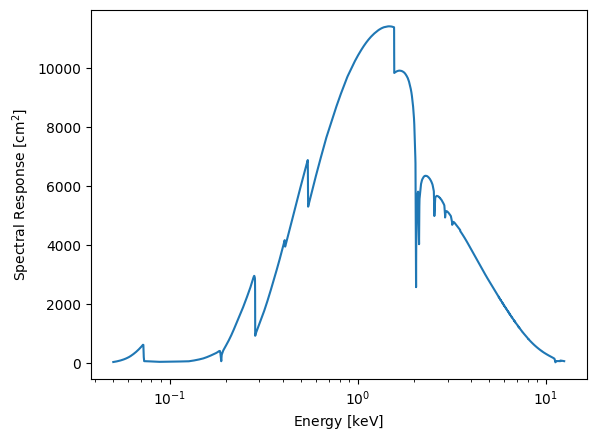

In [14]:
plot_arf(arf)

In [15]:
from jaxspec.instru.ogip import DataPHA

In [16]:
data_no_bin='/Users/florent/Documents/Codes/TestEagle/Hydrangea/Hydra_0_z20/Hydra_0/spec_0_nobkg.pha'
data_bin='/Users/florent/Documents/Codes/TestEagle/Hydrangea/Hydra_0_z20/Hydra_0/spec_0_nobkg_binned.pha'

In [17]:
pha_no_bin=DataPHA.from_file(data_no_bin)
pha_bin=DataPHA.from_file(data_bin)

In [31]:
def plot_pha(self):
    import matplotlib.pyplot as plt
    plt.figure()
    plt.scatter(self.channel, np.array(self.counts)/self.exposure,s=10)
    plt.xlabel(f'Channel')
    plt.ylabel(f'Countrate [cts/s]')
    #plt.loglog()
    plt.show()

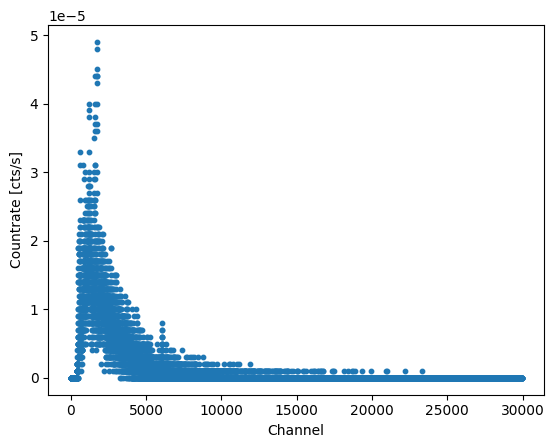

In [32]:
plot_pha(pha_bin)

In [33]:
from jaxspec.instru.ogip import DataRMF

In [34]:
rmf_file='/Users/florent/Documents/Codes/TestEagle/Setup/XIFU.rmf'

In [35]:
rmf=DataRMF.from_file(rmf_file)

In [36]:
np.dot(rmf.full_matrix,arf.specresp).shape

(29931,)

In [39]:
spec=pha_bin.counts.value/np.dot(rmf.full_matrix,arf.specresp)

/Users/florent/anaconda3/envs/jaxspec/lib/python3.9/site-packages/astropy/units/quantity.py:673: RuntimeWarning: invalid value encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


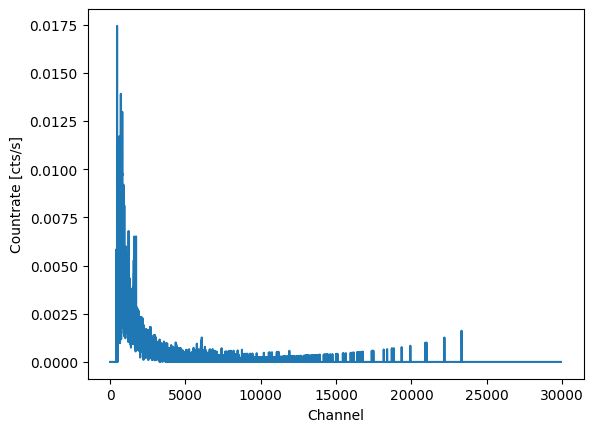

In [40]:
plt.figure()
plt.plot(spec)
plt.xlabel(f'Channel')
plt.ylabel(f'Countrate [cts/s]')
#plt.loglog()
plt.show()

In [60]:
rmf_file='/Users/florent/Documents/GitHub/jaxspec/tests/data/ogip/PN.rmf'
arf_file='/Users/florent/Documents/GitHub/jaxspec/tests/data/ogip/PN.arf'

In [49]:
matrix_table = QTable.read(rmf_file, 'MATRIX')
ebounds_table = QTable.read(rmf_file, 'EBOUNDS')

In [50]:
matrix_table

ENERG_LO,ENERG_HI,N_GRP,F_CHAN,N_CHAN,MATRIX
keV,keV,,,,
float32,float32,int16,int16[8],int16[8],object
0.05000000074505806,0.050999999046325684,1,0 .. 0,36 .. 0,[7.5168818e-02 7.9268105e-02 8.1745662e-02 8.2468182e-02 8.1449360e-02\n 7.8793660e-02 7.4712306e-02 6.9500789e-02 6.3364662e-02 5.6731332e-02\n 4.9841914e-02 4.2900845e-02 3.6276363e-02 3.0044179e-02 2.4364946e-02\n 1.9378340e-02 1.5050798e-02 1.1439273e-02 8.5060326e-03 6.1562462e-03\n 4.3599037e-03 3.0135557e-03 2.0210645e-03 1.3277909e-03 8.4843877e-04\n 5.2614807e-04 3.1922458e-04 1.8815571e-04 1.0754944e-04 6.0144870e-05\n 3.2632408e-05 1.7173577e-05 8.8445195e-06 4.4151075e-06 2.1365211e-06\n 1.0121722e-06]
0.050999999046325684,0.052000001072883606,1,0 .. 0,36 .. 0,[7.2942033e-02 7.7115580e-02 7.9759203e-02 8.0736130e-02 8.0042809e-02\n 7.7769026e-02 7.4098028e-02 6.9296822e-02 6.3550927e-02 5.7256322e-02\n 5.0640590e-02 4.3898467e-02 3.7391312e-02 3.1201458e-02 2.5498301e-02\n 2.0436088e-02 1.5995938e-02 1.2251579e-02 9.1796508e-03 6.6945241e-03\n 4.7765379e-03 3.3258782e-03 2.2469335e-03 1.4867513e-03 9.5675857e-04\n 5.9751677e-04 3.6503267e-04 2.1663753e-04 1.2467972e-04 7.0195347e-05\n 3.8341725e-05 2.0313972e-05 1.0531491e-05 5.2918704e-06 2.5779141e-06\n 1.2297362e-06]
0.052000001072883606,0.05299999937415123,1,0 .. 0,36 .. 0,[7.1002461e-02 7.5221233e-02 7.7988803e-02 7.9167478e-02 7.8741297e-02\n 7.6789089e-02 7.3471583e-02 6.9031693e-02 6.3637480e-02 5.7656202e-02\n 5.1301703e-02 4.4758055e-02 3.8377482e-02 3.2246161e-02 2.6539201e-02\n 2.1422438e-02 1.6889744e-02 1.3029859e-02 9.8330453e-03 7.2228671e-03\n 5.1901178e-03 3.6392997e-03 2.4760223e-03 1.6496263e-03 1.0688561e-03\n 6.7210023e-04 4.1335705e-04 2.4696469e-04 1.4308780e-04 8.1091021e-05\n 4.4586250e-05 2.3779230e-05 1.2407543e-05 6.2756890e-06 3.0777594e-06\n 1.4770733e-06]
0.05299999937415123,0.05400000140070915,1,0 .. 0,36 .. 0,[6.8988860e-02 7.3283225e-02 7.6203384e-02 7.7607609e-02 7.7464893e-02\n 7.5842455e-02 7.2878636e-02 6.8793923e-02 6.3741110e-02 5.8061562e-02\n 5.1957719e-02 4.5604676e-02 3.9346553e-02 3.3273280e-02 2.7565090e-02\n 2.2398299e-02 1.7778441e-02 1.3808178e-02 1.0490670e-02 7.7583562e-03\n 5.6123603e-03 3.9617163e-03 2.7135445e-03 1.8198346e-03 1.1869411e-03\n 7.5130677e-04 4.6509190e-04 2.7969384e-04 1.6311496e-04 9.3040013e-05\n 5.1488612e-05 2.7639655e-05 1.4515179e-05 7.3886677e-06 3.6470040e-06\n 1.7613711e-06]
0.05400000140070915,0.054999999701976776,1,0 .. 0,36 .. 0,[6.8830796e-02 7.2966620e-02 7.5757116e-02 7.7076063e-02 7.6902874e-02\n 7.5306624e-02 7.2421074e-02 6.8454713e-02 6.3547023e-02 5.8019210e-02\n 5.2058835e-02 4.5828711e-02 3.9661892e-02 3.3646304e-02 2.7962381e-02\n 2.2790862e-02 1.8143825e-02 1.4131571e-02 1.0764642e-02 7.9807667e-03\n 5.7864874e-03 4.0933420e-03 2.8093227e-03 1.8875418e-03 1.2332350e-03\n 7.8188971e-04 4.8476466e-04 2.9195106e-04 1.7050208e-04 9.7383388e-05\n 5.3962693e-05 2.9004605e-05 1.5250363e-05 7.7725736e-06 3.8410549e-06\n 1.8575479e-06]
0.054999999701976776,0.0560000017285347,1,0 .. 0,37 .. 0,[6.6886909e-02 7.1052186e-02 7.3948048e-02 7.5448960e-02 7.5524405e-02\n 7.4234687e-02 7.1693473e-02 6.8086930e-02 6.3538000e-02 5.8338795e-02\n 5.2661847e-02 4.6657324e-02 4.0645778e-02 3.4716439e-02 2.9052772e-02\n 2.3844967e-02 1.9117126e-02 1.4994294e-02 1.1501422e-02 8.5866414e-03\n 6.2685590e-03 4.4645704e-03 3.0850351e-03 2.0866429e-03 1.3724020e-03\n 8.7592541e-04 5.4662419e-04 3.3136422e-04 1.9478930e-04 1.1197504e-04\n 6.2450876e-05 3.3784941e-05 1.7877714e-05 9.1701777e-06 4.5612446e-06\n 2.2195725e-06 1.0479904e-06]
0.0560000017285347,0.05700000002980232,1,0 .. 0,37 .. 0,[6.4982213e-02 6.9199584e-02 7.2217040e-02 7.3907219e-02 7.4228369e-02\n 7.3232308e-02 7.1014479e-02 6.7741744e-02 6.3523643e-02 5.8627427e-02\n 5.3213216e-02 4.7420405e-02 4.1557964e-02 3.5715792e-02 3.0079035e-02\n 2.4845358e-02 2.0049009e-02 1.5827864e-02 1.2219954e-02 9.1831693e-03\n 6.7477254e-03 4.8370869e-03 3.3643632e-03 2.2902542e-03 1.5160530e-03\

In [51]:
ebounds_table

CHANNEL,E_MIN,E_MAX
,keV,keV
int16,float32,float32
0,0.0,0.005369989667087793
1,0.005369989667087793,0.01073989924043417
2,0.01073989924043417,0.01610969938337803
3,0.01610969938337803,0.021479200571775436
4,0.021479200571775436,0.02684840001165867
5,0.02684840001165867,0.032217301428318024
6,0.032217301428318024,0.037585701793432236
7,0.037585701793432236,0.0429534986615181


In [52]:
rmf=DataRMF.from_file(rmf_file)

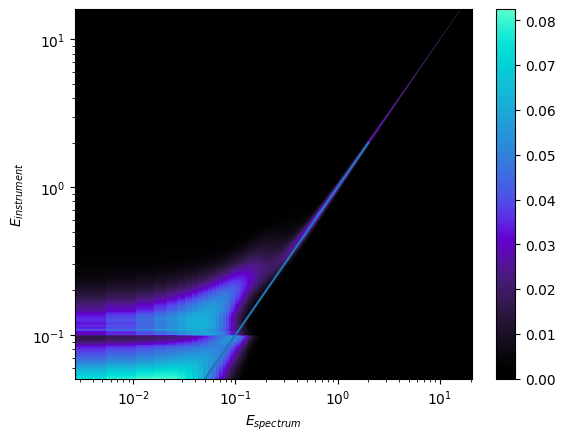

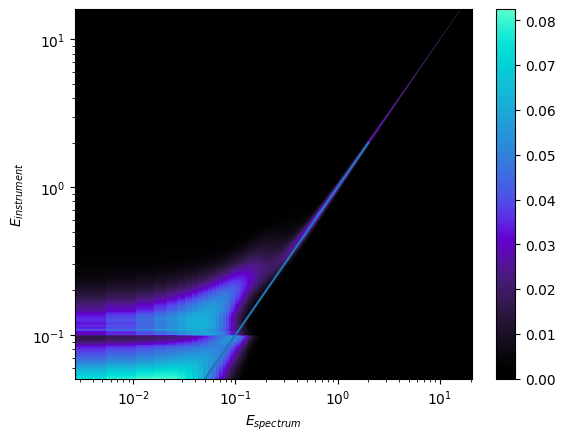

In [53]:
rmf.plot()

In [61]:
arf=DataARF.from_file(arf_file)

In [64]:
len(arf.specresp)

2067

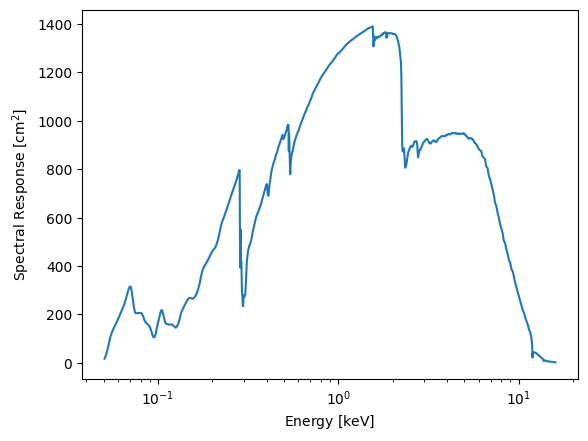

In [62]:
plot_arf(arf)

In [65]:
rmf.full_matrix.shape

(4096, 2067)

In [66]:
rmf.full_matrix

array([[0.07516882, 0.07294203, 0.07100246, ..., 0.        , 0.        ,
        0.        ],
       [0.07926811, 0.07711558, 0.07522123, ..., 0.        , 0.        ,
        0.        ],
       [0.08174566, 0.0797592 , 0.0779888 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [67]:
arf.specresp

<Quantity [17.016987 , 32.83989  , 57.083954 , ...,  1.998787 ,  1.9693973,
            1.9400808] cm2>

In [69]:
np.dot(rmf.full_matrix,arf.specresp).shape

(4096,)

In [58]:
np.unique(rmf.e_max-rmf.e_min)

<Quantity [0.0048399 , 0.00484002, 0.00484014, 0.00484991, 0.00485003,
           0.00485015, 0.00485992, 0.00485998, 0.00486004, 0.00486016,
           0.00486094, 0.004861  , 0.00486302, 0.00486398, 0.004866  ,
           0.00486797, 0.00486904, 0.00486994, 0.00487   , 0.00487006,
           0.00487196, 0.00487202, 0.00487399, 0.00487602, 0.00487703,
           0.00487798, 0.00487983, 0.00487995, 0.00488001, 0.00488007,
           0.00488096, 0.00488299, 0.004884  , 0.00488603, 0.004888  ,
           0.00488895, 0.00488997, 0.00489008, 0.00489098, 0.00489306,
           0.00489497, 0.00489599, 0.00489902, 0.00489986, 0.00489998,
           0.00490004, 0.0049001 , 0.00490195, 0.00490397, 0.00490701,
           0.00490803, 0.00490987, 0.00490999, 0.00491005, 0.00491011,
           0.00491291, 0.00491405, 0.00491697, 0.00491989, 0.00492001,
           0.00492007, 0.00492013, 0.00492096, 0.004924  , 0.00492603,
           0.00492799, 0.0049299 , 0.00493002, 0.00493014, 0.00493097,
      

In [59]:
0.00036*29931

10.775160000000001

KeyboardInterrupt: 

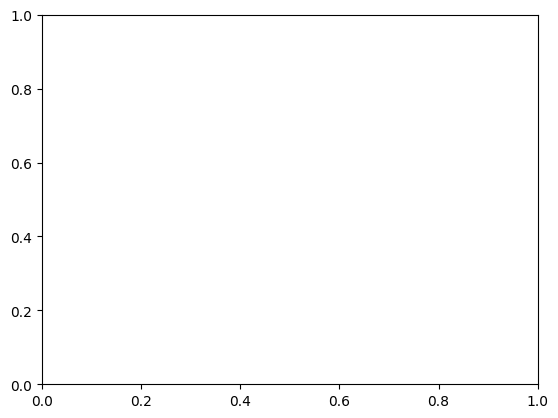

In [46]:
rmf.plot()